In [27]:
import pandas as pd
features = pd.read_csv("../data/features.csv")
labels = pd.read_csv("../data/genre.csv")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.8, random_state=1)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = rf.feature_importances_
print(importances)


/tmp/ipykernel_4381/484731702.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


[0.09866862 0.07925873 0.02776319 0.08507944 0.00910131 0.06745488
 0.06754709 0.09321659 0.050551   0.07002633 0.22351104 0.12782179]


In [28]:
features=features.drop(features.columns[4],axis=1)
features=features.drop(features.columns[2],axis=1)

In [29]:

X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.8, random_state=1)

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='sag',penalty='none',max_iter=1000,C=100)  # Erhöhen Sie max_iter bei Konvergenzproblemen
model.fit(X_train, y_train)

/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100, max_iter=1000, penalty='none', solver='sag')

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


                 precision    recall  f1-score   support

      Dark Trap       0.47      0.37      0.41       955
            Emo       0.38      0.38      0.38       339
         Hiphop       0.47      0.37      0.41       594
            Pop       1.00      0.01      0.02        88
            Rap       0.39      0.27      0.31       372
            RnB       0.36      0.28      0.31       405
     Trap Metal       0.42      0.25      0.31       402
Underground Rap       0.45      0.64      0.53      1219
            dnb       0.76      0.82      0.79       598
      hardstyle       0.58      0.68      0.63       576
      psytrance       0.81      0.87      0.84       522
      techhouse       0.72      0.79      0.75       594
         techno       0.80      0.81      0.81       550
         trance       0.64      0.66      0.65       590
           trap       0.68      0.70      0.69       602

       accuracy                           0.58      8406
      macro avg       0.60   

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['none', 'l2','l1'], 'solver': ['sag', 'lbfgs'], 'max_iter': [2000]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5,verbose=2)
grid.fit(X_train, y_train)
print("Beste Hyperparameter:", grid.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=0.01, max_iter=2000, penalty=none, solver=sag; total time=   0.4s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=0.01, max_iter=2000, penalty=none, solver=sag; total time=   0.6s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=0.01, max_iter=2000, penalty=none, solver=sag; total time=   0.6s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=0.01, max_iter=2000, penalty=none, solver=sag; total time=   0.6s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=0.01, max_iter=2000, penalty=none, solver=sag; total time=   0.5s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..C=0.01, max_iter=2000, penalty=none, solver=lbfgs; total time=   5.2s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..C=0.01, max_iter=2000, penalty=none, solver=lbfgs; total time=   5.4s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..C=0.01, max_iter=2000, penalty=none, solver=lbfgs; total time=  14.2s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..C=0.01, max_iter=2000, penalty=none, solver=lbfgs; total time=   9.1s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..C=0.01, max_iter=2000, penalty=none, solver=lbfgs; total time=  28.4s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=0.01, max_iter=2000, penalty=l2, solver=sag; total time=   0.4s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=0.01, max_iter=2000, penalty=l2, solver=sag; total time=   0.4s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=0.01, max_iter=2000, penalty=l2, solver=sag; total time=   0.4s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=0.01, max_iter=2000, penalty=l2, solver=sag; total time=   0.3s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=0.01, max_iter=2000, penalty=l2, solver=sag; total time=   0.4s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=0.01, max_iter=2000, penalty=l2, solver=lbfgs; total time=   1.5s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=0.01, max_iter=2000, penalty=l2, solver=lbfgs; total time=   1.7s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=0.01, max_iter=2000, penalty=l2, solver=lbfgs; total time=   1.4s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=0.01, max_iter=2000, penalty=l2, solver=lbfgs; total time=   1.7s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=0.01, max_iter=2000, penalty=l2, solver=lbfgs; total time=   1.2s
[CV] END ......C=0.01, max_iter=2000, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......C=0.01, max_iter=2000, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......C=0.01, max_iter=2000, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......C=0.01, max_iter=2000, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......C=0.01, max_iter=2000, penalty=l1, solver=sag; total time=   0.0s
[CV] END ....C=0.01, max_iter=2000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.01, max_iter=2000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.01, max_iter=2000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.01, max_iter=2000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.01, max_iter=2000, penalty=l1, solver=lbfgs; total time=   0.0s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=0.1, max_iter=2000, penalty=none, solver=sag; total time=   0.9s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=0.1, max_iter=2000, penalty=none, solver=sag; total time=   1.1s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=0.1, max_iter=2000, penalty=none, solver=sag; total time=   1.0s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=0.1, max_iter=2000, penalty=none, solver=sag; total time=   0.9s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=0.1, max_iter=2000, penalty=none, solver=sag; total time=   1.0s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...C=0.1, max_iter=2000, penalty=none, solver=lbfgs; total time=   9.8s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...C=0.1, max_iter=2000, penalty=none, solver=lbfgs; total time=   9.1s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...C=0.1, max_iter=2000, penalty=none, solver=lbfgs; total time=   8.7s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...C=0.1, max_iter=2000, penalty=none, solver=lbfgs; total time=  15.2s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...C=0.1, max_iter=2000, penalty=none, solver=lbfgs; total time=  16.3s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=0.1, max_iter=2000, penalty=l2, solver=sag; total time=   0.4s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=0.1, max_iter=2000, penalty=l2, solver=sag; total time=   0.4s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=0.1, max_iter=2000, penalty=l2, solver=sag; total time=   0.4s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=0.1, max_iter=2000, penalty=l2, solver=sag; total time=   0.4s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=0.1, max_iter=2000, penalty=l2, solver=sag; total time=   0.4s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=0.1, max_iter=2000, penalty=l2, solver=lbfgs; total time=   3.0s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=0.1, max_iter=2000, penalty=l2, solver=lbfgs; total time=   2.7s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=0.1, max_iter=2000, penalty=l2, solver=lbfgs; total time=   2.8s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=0.1, max_iter=2000, penalty=l2, solver=lbfgs; total time=   3.2s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=0.1, max_iter=2000, penalty=l2, solver=lbfgs; total time=   7.4s
[CV] END .......C=0.1, max_iter=2000, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=0.1, max_iter=2000, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=0.1, max_iter=2000, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=0.1, max_iter=2000, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=0.1, max_iter=2000, penalty=l1, solver=sag; total time=   0.0s
[CV] END .....C=0.1, max_iter=2000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=2000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=2000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=2000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=2000, penalty=l1, solver=lbfgs; total time=   0.0s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=1, max_iter=2000, penalty=none, solver=sag; total time=   1.1s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=1, max_iter=2000, penalty=none, solver=sag; total time=   0.9s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=1, max_iter=2000, penalty=none, solver=sag; total time=   1.1s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=1, max_iter=2000, penalty=none, solver=sag; total time=   1.0s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=1, max_iter=2000, penalty=none, solver=sag; total time=   0.9s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=1, max_iter=2000, penalty=none, solver=lbfgs; total time=  24.7s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=1, max_iter=2000, penalty=none, solver=lbfgs; total time=   9.3s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=1, max_iter=2000, penalty=none, solver=lbfgs; total time=   7.8s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=1, max_iter=2000, penalty=none, solver=lbfgs; total time=   7.3s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=1, max_iter=2000, penalty=none, solver=lbfgs; total time=  12.3s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........C=1, max_iter=2000, penalty=l2, solver=sag; total time=   0.7s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........C=1, max_iter=2000, penalty=l2, solver=sag; total time=   0.7s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........C=1, max_iter=2000, penalty=l2, solver=sag; total time=   0.6s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........C=1, max_iter=2000, penalty=l2, solver=sag; total time=   0.7s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .........C=1, max_iter=2000, penalty=l2, solver=sag; total time=   0.7s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=1, max_iter=2000, penalty=l2, solver=lbfgs; total time=   4.7s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=1, max_iter=2000, penalty=l2, solver=lbfgs; total time=   4.7s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=1, max_iter=2000, penalty=l2, solver=lbfgs; total time=   5.0s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=1, max_iter=2000, penalty=l2, solver=lbfgs; total time=   5.3s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=1, max_iter=2000, penalty=l2, solver=lbfgs; total time=   5.3s
[CV] END .........C=1, max_iter=2000, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, max_iter=2000, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, max_iter=2000, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, max_iter=2000, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, max_iter=2000, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=1, max_iter=2000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_iter=2000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_iter=2000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_iter=2000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_iter=2000, penalty=l1, solver=lbfgs; total time=   0.0s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=10, max_iter=2000, penalty=none, solver=sag; total time=   1.0s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=10, max_iter=2000, penalty=none, solver=sag; total time=   1.0s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=10, max_iter=2000, penalty=none, solver=sag; total time=   1.0s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=10, max_iter=2000, penalty=none, solver=sag; total time=   0.9s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=10, max_iter=2000, penalty=none, solver=sag; total time=   0.9s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=10, max_iter=2000, penalty=none, solver=lbfgs; total time=   7.8s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=10, max_iter=2000, penalty=none, solver=lbfgs; total time=   8.2s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=10, max_iter=2000, penalty=none, solver=lbfgs; total time=   8.4s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=10, max_iter=2000, penalty=none, solver=lbfgs; total time=   7.9s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....C=10, max_iter=2000, penalty=none, solver=lbfgs; total time=  11.8s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........C=10, max_iter=2000, penalty=l2, solver=sag; total time=   1.0s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........C=10, max_iter=2000, penalty=l2, solver=sag; total time=   0.9s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........C=10, max_iter=2000, penalty=l2, solver=sag; total time=   1.1s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........C=10, max_iter=2000, penalty=l2, solver=sag; total time=   1.0s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........C=10, max_iter=2000, penalty=l2, solver=sag; total time=   1.1s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=10, max_iter=2000, penalty=l2, solver=lbfgs; total time=   7.7s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=10, max_iter=2000, penalty=l2, solver=lbfgs; total time=   9.2s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=10, max_iter=2000, penalty=l2, solver=lbfgs; total time=   8.8s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=10, max_iter=2000, penalty=l2, solver=lbfgs; total time=   8.1s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=10, max_iter=2000, penalty=l2, solver=lbfgs; total time=   8.2s
[CV] END ........C=10, max_iter=2000, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, max_iter=2000, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, max_iter=2000, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, max_iter=2000, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, max_iter=2000, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......C=10, max_iter=2000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, max_iter=2000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, max_iter=2000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, max_iter=2000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, max_iter=2000, penalty=l1, solver=lbfgs; total time=   0.0s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=100, max_iter=2000, penalty=none, solver=sag; total time=   1.1s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=100, max_iter=2000, penalty=none, solver=sag; total time=   1.0s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=100, max_iter=2000, penalty=none, solver=sag; total time=   1.0s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=100, max_iter=2000, penalty=none, solver=sag; total time=   1.0s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=100, max_iter=2000, penalty=none, solver=sag; total time=   1.0s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...C=100, max_iter=2000, penalty=none, solver=lbfgs; total time=   9.1s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...C=100, max_iter=2000, penalty=none, solver=lbfgs; total time=   9.9s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...C=100, max_iter=2000, penalty=none, solver=lbfgs; total time=   9.0s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...C=100, max_iter=2000, penalty=none, solver=lbfgs; total time=   9.1s


/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...C=100, max_iter=2000, penalty=none, solver=lbfgs; total time=  15.1s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=100, max_iter=2000, penalty=l2, solver=sag; total time=   0.9s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=100, max_iter=2000, penalty=l2, solver=sag; total time=   1.0s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=100, max_iter=2000, penalty=l2, solver=sag; total time=   0.9s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=100, max_iter=2000, penalty=l2, solver=sag; total time=   0.9s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......C=100, max_iter=2000, penalty=l2, solver=sag; total time=   1.0s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=100, max_iter=2000, penalty=l2, solver=lbfgs; total time=   9.4s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=100, max_iter=2000, penalty=l2, solver=lbfgs; total time=   8.4s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=100, max_iter=2000, penalty=l2, solver=lbfgs; total time=   8.7s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=100, max_iter=2000, penalty=l2, solver=lbfgs; total time=  17.9s


/home/karl/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=100, max_iter=2000, penalty=l2, solver=lbfgs; total time=   9.4s
[CV] END .......C=100, max_iter=2000, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=100, max_iter=2000, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=100, max_iter=2000, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=100, max_iter=2000, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=100, max_iter=2000, penalty=l1, solver=sag; total time=   0.0s
[CV] END .....C=100, max_iter=2000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_iter=2000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_iter=2000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_iter=2000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_iter=2000, penalty=l1, solver=lbfgs; total time=   0.0s


/home/karl/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/home/karl/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 61, in _check_solver
    raise 

Beste Hyperparameter: {'C': 0.01, 'max_iter': 2000, 'penalty': 'none', 'solver': 'sag'}


In [41]:
grid.best_score_

0.5791912983287961

/home/karl/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/karl/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/karl/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


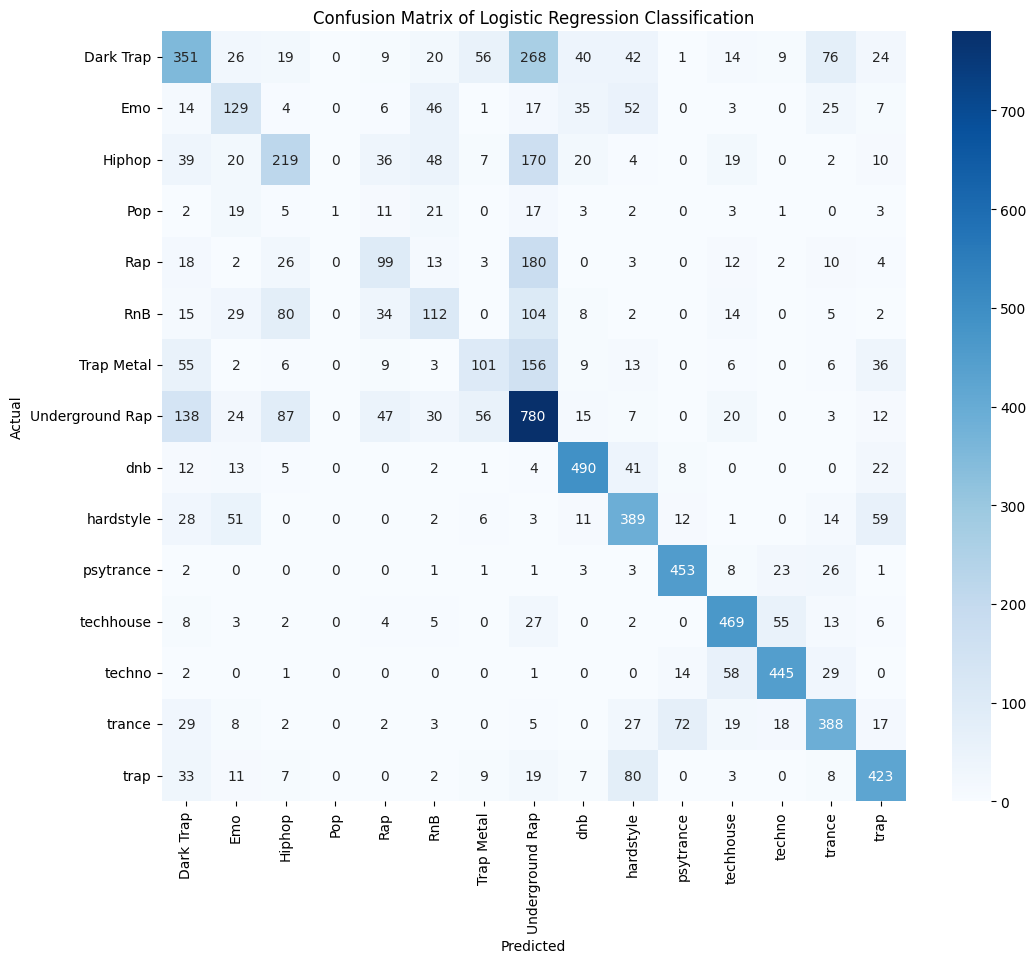

Accuracy: 0.5768498691410897
Classification Report:
                 precision    recall  f1-score   support

      Dark Trap       0.47      0.37      0.41       955
            Emo       0.38      0.38      0.38       339
         Hiphop       0.47      0.37      0.41       594
            Pop       1.00      0.01      0.02        88
            Rap       0.39      0.27      0.31       372
            RnB       0.36      0.28      0.31       405
     Trap Metal       0.42      0.25      0.31       402
Underground Rap       0.45      0.64      0.53      1219
            dnb       0.76      0.82      0.79       598
      hardstyle       0.58      0.68      0.63       576
      psytrance       0.81      0.87      0.84       522
      techhouse       0.72      0.79      0.75       594
         techno       0.80      0.81      0.81       550
         trance       0.64      0.66      0.65       590
           trap       0.68      0.70      0.69       602

       accuracy                   

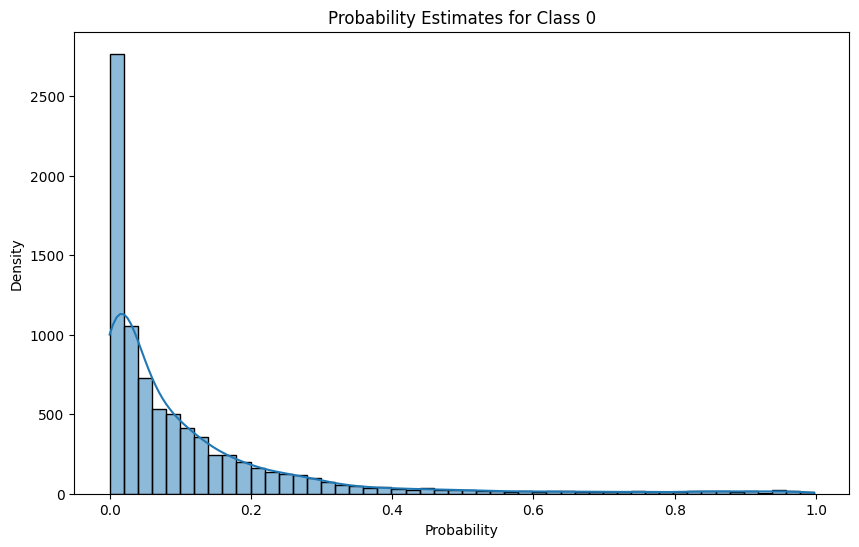

            Feature  Coefficient
9       duration_ms    -8.491021
2          loudness    -4.822146
1            energy    -4.159458
3       speechiness     3.959088
8             tempo     3.855645
4      acousticness     3.541933
5  instrumentalness     2.502053
7           valence    -1.473259
0      danceability    -1.112778
6          liveness    -0.535828


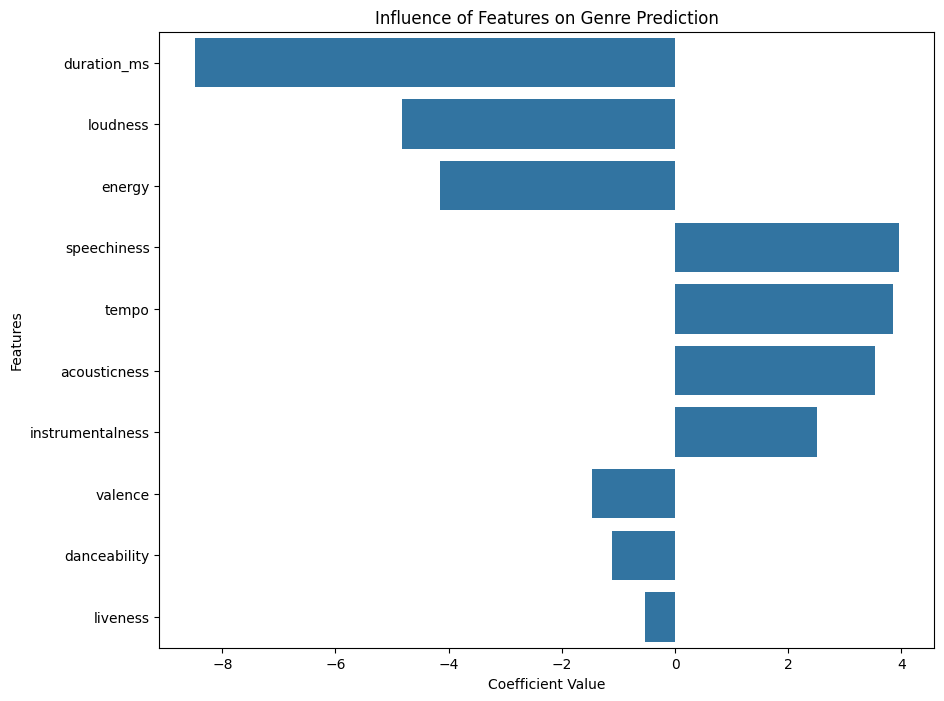

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# Assuming 'labels', 'X_train', 'X_test', 'y_train', 'y_test' are predefined and appropriate for your context

encoder = LabelEncoder()
encoder.fit(labels)  # Fit the encoder with all possible labels

# Transform labels to encoded version
y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Train logistic regression model
log_reg_model = LogisticRegression(C=0.01, max_iter=2000, penalty='none', solver='sag')
log_reg_model.fit(X_train, y_train_encoded)

# Predict the test set results and reverse transform to original labels
y_pred_encoded = log_reg_model.predict(X_test)
y_pred = encoder.inverse_transform(y_pred_encoded)
y_test = encoder.inverse_transform(y_test_encoded)

# Get probability estimates
prob_estimates = log_reg_model.predict_proba(X_test)
# Reverse transform the probabilities to match the original labels (if necessary)
# Here, no transformation is necessary as the probabilities correspond to the encoder's classes

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix of Logistic Regression Classification')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

# Optionally, visualize the probability estimates for a specific class
# For example, let's plot the probability estimates for the first class
plt.figure(figsize=(10, 6))
sns.histplot(prob_estimates[:, 0], bins=50, kde=True)
plt.title('Probability Estimates for Class 0')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.show()
# Assuming 'X_train' is a DataFrame with column names representing features
feature_names = X_train.columns  # replace with your actual DataFrame column extraction if necessary

# Extracting coefficients from the logistic regression model
coefficients = log_reg_model.coef_[0]  # This gets the coefficients for the first class, modify if multi-class

# Creating a DataFrame to view the coefficients alongside feature names for easier interpretation
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sorting the DataFrame by the absolute values of the coefficients for better visibility of the most influential features
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

# Displaying the DataFrame
print(coef_df)

# Plotting the coefficients for visual interpretation
plt.figure(figsize=(10, 8))
sns.barplot(data=coef_df, x='Coefficient', y='Feature')
plt.title('Influence of Features on Genre Prediction')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()